In [3]:
import pandas as pd
import numpy as np
import seaborn as seab
import matplotlib.pyplot as plt

#Зчитуємо файл, але пропускаємо перші 4 рядки (там додаткова інформація, яка тут нам не потрібна
df = pd.read_excel("dds_ch2_rollingsales/rollingsales_bronx.xls",skiprows=4)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 4G",,...,0,0,0,0,0,1958,2,D4,150000,2013-02-06
5264,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,87,,D4,"4315 WEBSTER AVENUE, 5D",,...,0,0,0,0,0,1958,2,D4,108500,2013-04-10
5265,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 2J",,...,0,0,0,0,0,1957,2,D4,126000,2012-09-28
5266,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 1G",,...,0,0,0,0,0,1957,2,D4,125000,2013-05-23


In [21]:
#колонки, які є у файлі (властивості об'єкту)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         5268 non-null   int64         
 1   NEIGHBORHOOD                    5268 non-null   object        
 2   BUILDING CLASS CATEGORY         5268 non-null   object        
 3   TAX CLASS AT PRESENT            5268 non-null   object        
 4   BLOCK                           5268 non-null   int64         
 5   LOT                             5268 non-null   int64         
 6   EASE-MENT                       5268 non-null   object        
 7   BUILDING CLASS AT PRESENT       5268 non-null   object        
 8   ADDRESS                         5268 non-null   object        
 9   APARTMENT NUMBER                5268 non-null   object        
 10  ZIP CODE                        5268 non-null   int64         
 11  RESI

In [22]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [24]:
#робимо значення 0 як NaN
df['YEAR BUILT'][df['YEAR BUILT'] == 0] = np.NaN
df['SALE PRICE'][df['SALE PRICE'] == 0] = np.NaN
df['GROSS SQUARE FEET'][df['GROSS SQUARE FEET'] == 0] = np.NaN

/tmp/ipykernel_14550/2870018945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR BUILT'][df['YEAR BUILT'] == 0] = np.NaN
/tmp/ipykernel_14550/2870018945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE PRICE'][df['SALE PRICE'] == 0] = np.NaN
/tmp/ipykernel_14550/2870018945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GROSS SQUARE FEET'][df['GROSS SQUARE FEET'] == 0] = np.NaN


<AxesSubplot: >

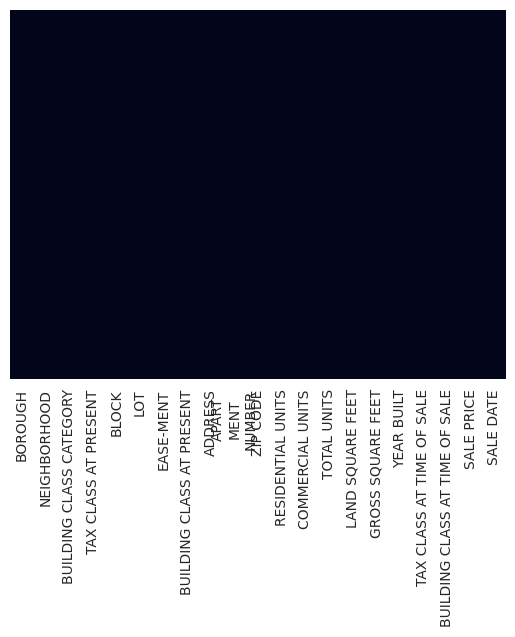

In [98]:
seab.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [32]:
# видалення пустих значень
df.dropna(axis=0,inplace=True)

In [33]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,1842,2048.0,1901.0,1,A5,355000.0,2013-07-08
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,1103,1290.0,1910.0,1,A1,474819.0,2013-05-20
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,1986,1344.0,1899.0,1,A1,210000.0,2013-03-12
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431.0,1901.0,1,A1,343116.0,2013-07-01
5,2,BATHGATE,02 TWO FAMILY HOMES,1,2912,158,,B1,505 EAST 171ST STREET,,...,2,0,2,2000,2400.0,1993.0,1,B1,316500.0,2012-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,2,WOODLAWN,03 THREE FAMILY HOMES,1,3385,44,,C0,335 EAST 236 STREET,,...,3,0,3,7754,3539.0,1910.0,1,C0,630000.0,2013-03-13
5245,2,WOODLAWN,07 RENTALS - WALKUP APARTMENTS,2A,3376,70,,C2,265 EAST 235 STREET,,...,5,0,5,6100,2640.0,1925.0,2,C2,709600.0,2013-05-21
5246,2,WOODLAWN,07 RENTALS - WALKUP APARTMENTS,2,3377,80,,C1,251 EAST 236 STREET,,...,22,0,22,5000,17400.0,1912.0,2,C1,2250000.0,2013-08-01
5247,2,WOODLAWN,07 RENTALS - WALKUP APARTMENTS,2A,3379,76,,C2,257 EAST 238 STREET,,...,6,0,6,3000,3350.0,1927.0,2,C2,700000.0,2012-08-29


[Text(0.5, 1.0, 'Продажі на район')]

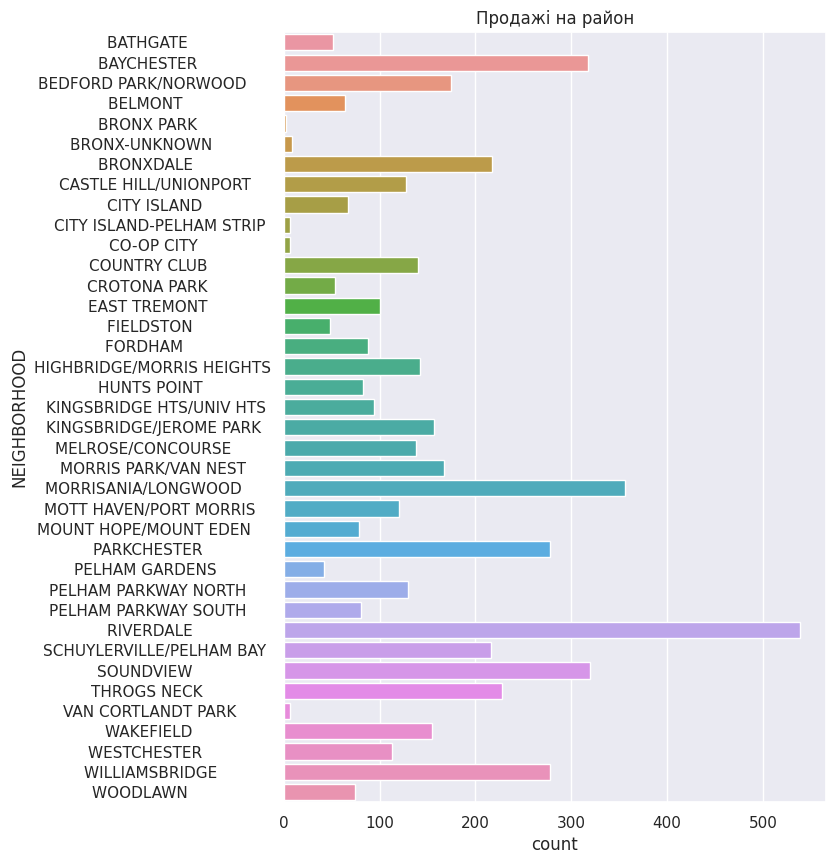

In [102]:
#seaborn, продажі на район
seab.set(rc={"figure.figsize": (7,10)})
seab.countplot(data=df,y="NEIGHBORHOOD").set(title="Продажі на район")

/tmp/ipykernel_14550/4211022589.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seab.barplot(y='NEIGHBORHOOD',x='RESIDENTIAL UNITS',data=df,ci=None).set(title="Продаж ЖИТЛОВИХ будівель (по районам)")


[Text(0.5, 1.0, 'Продаж ЖИТЛОВИХ будівель (по районам)')]

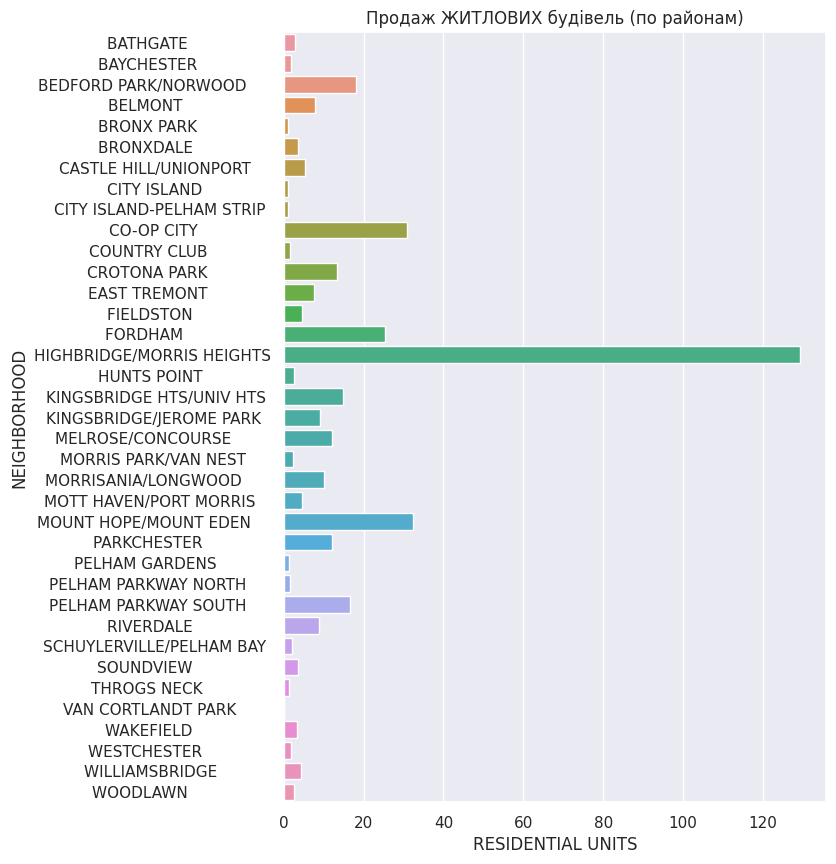

In [35]:
# тільки житлові будинки
seab.barplot(y='NEIGHBORHOOD',x='RESIDENTIAL UNITS',data=df,ci=None).set(title="Продаж ЖИТЛОВИХ будівель (по районам)")

/tmp/ipykernel_30793/1503392525.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seab.barplot(y='NEIGHBORHOOD',x='COMMERCIAL UNITS',data=df,ci=None).set(title="Продаж КОМЕРЦІЙНИХ будівель (по районам)")


[Text(0.5, 1.0, 'Продаж КОМЕРЦІЙНИХ будівель (по районам)')]

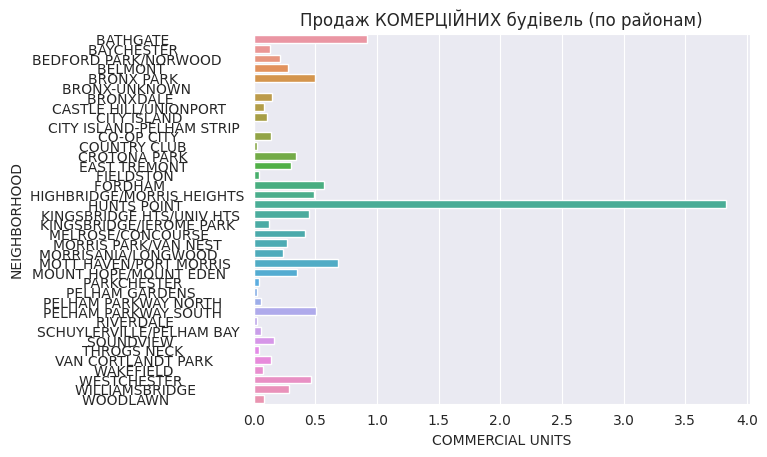

In [4]:
# тільки комерція (вибираємо відповідний стовпець COMMERCIAL UNITS з excel файлу
seab.barplot(y='NEIGHBORHOOD',x='COMMERCIAL UNITS',data=df,ci=None).set(title="Продаж КОМЕРЦІЙНИХ будівель (по районам)")

[Text(0.5, 1.0, 'Групування за роками побудови')]

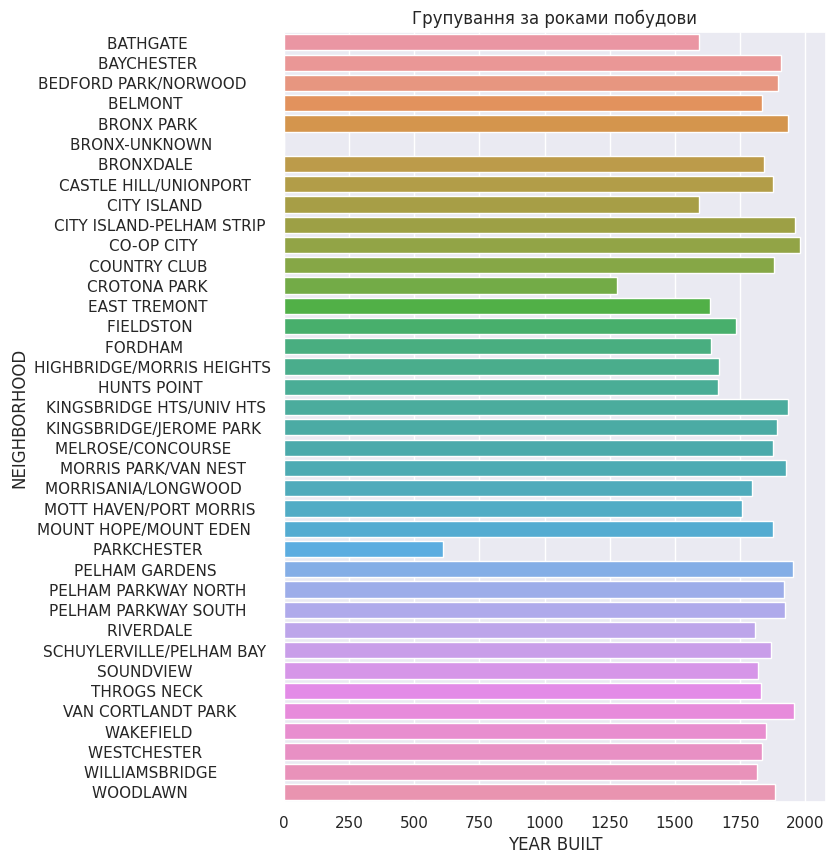

In [130]:
seab.barplot(y='NEIGHBORHOOD',x='YEAR BUILT',data=df,errorbar=None).set(title="Групування за роками побудови")

/tmp/ipykernel_30793/2430670417.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prices_over_1mln=df[['SALE PRICE','YEAR BUILT']][df['SALE PRICE']>1000000][df['YEAR BUILT']>1900]


<AxesSubplot: title={'center': 'Продані дорожче 1млн'}, xlabel='YEAR BUILT', ylabel='продажна ціна'>

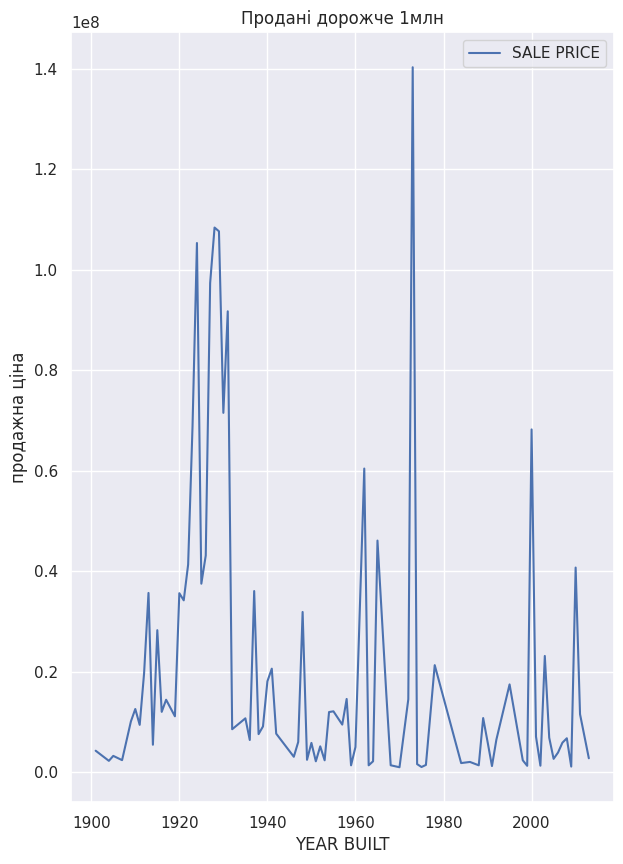

In [117]:
# знаходимо ціни більше млн та рік побудови більше 1900
prices_over_1mln=df[['SALE PRICE','YEAR BUILT']][df['SALE PRICE']>1000000][df['YEAR BUILT']>1900]
prices_over_1mln.groupby('YEAR BUILT').sum().plot(y='SALE PRICE',ylabel='продажна ціна', title='Продані дорожче 1млн')

/tmp/ipykernel_30793/2623926133.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  years=df.groupby(df["SALE DATE"].dt.year).sum()


<AxesSubplot: title={'center': 'ціна продажу в 12-ому та 13-ому році'}, xlabel='рік продажу', ylabel='ціна продажу'>

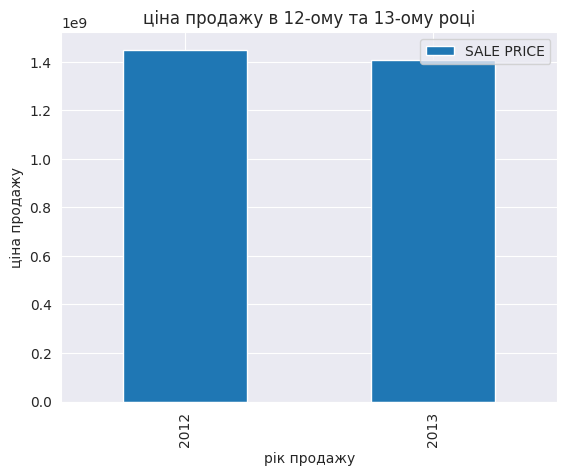

In [13]:
# так як у нас є дані лише за 2 роки продажу (12, 13), то порівнюємо їх
years=df.groupby(df["SALE DATE"].dt.year).sum()
years.plot(kind='bar',y='SALE PRICE',xlabel='рік продажу',ylabel='ціна продажу',title='ціна продажу в 12-ому та 13-ому році')

<AxesSubplot: xlabel='класова категорія будівлі', ylabel='Середнє значення ціни'>

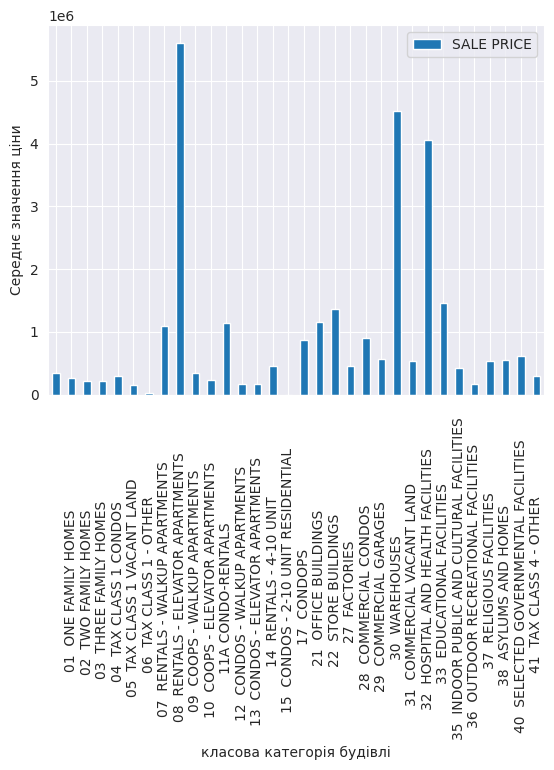

In [91]:
# беремо з файлу параметр КАТЕГОРІЯ БУДІВЛІ та групуємо їх згідно середніх цін
building_class_category=df.groupby("BUILDING CLASS CATEGORY")[["SALE PRICE"]].mean()
building_class_category.plot(kind='bar',xlabel="класова категорія будівлі",ylabel="Середнє значення ціни")

In [148]:
# Отримуємо значення класів будівель в момент продажу
# Функією unique обираємо лише унікальні значення

buildings_classes_time_of_sale=df['BUILDING CLASS AT TIME OF SALE'].unique()
buildings_classes_time_of_sale

array(['A5', 'A1', 'S2', 'B1', 'B3', 'B2', 'C0', 'V0', 'C1', 'C4', 'C7',
       'D4', 'S9', 'S4', 'K1', 'K2', 'K4', 'F5', 'G9', 'G2', 'G7', 'E7',
       'V9', 'V1', 'Z9', 'A9', 'A2', 'B9', 'R3', 'Z0', 'G0', 'C3', 'C9',
       'O1', 'O9', 'O5', 'O6', 'R5', 'G8', 'G4', 'E1', 'E9', 'E3', 'C2',
       'D1', 'D7', 'C6', 'O7', 'K9', 'F4', 'G5', 'G6', 'S1', 'D9', 'R4',
       'S3', 'O8', 'K5', 'D3', 'RG', 'A6', 'R2', 'Q8', 'Z6', 'A7', 'A3',
       'RR', 'A0', 'Q1', 'N9', 'M1', 'V3', 'C5', 'D5', 'D6', 'R9', 'G1',
       'I5', 'RK', 'F9', 'E4', 'Y6', 'W6', 'RP', 'RS', 'R6', 'P8', 'I9',
       'S5', 'W1', 'M9', 'P5', 'W3', 'I6', 'W2', 'F1', 'W4', 'RB', 'A4',
       'S0', 'R1', 'I1', 'M3'], dtype=object)